# Preprocessing

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [2]:
# Load dataset
heart_dataset = pd.read_csv('heart_2020_cleaned.csv')

# Copy dataset for processing
heart_dataset_preprocessed = heart_dataset.copy()

# Split dataset into target and none-target
heart_dataset_target = heart_dataset_preprocessed['HeartDisease']
heart_dataset_preprocessed = heart_dataset_preprocessed.drop(columns='HeartDisease')

# First look at data
print(heart_dataset.index)
heart_dataset.head()

RangeIndex(start=0, stop=319795, step=1)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# More detailed look at data
display(heart_dataset.describe(include='all'))
heart_dataset.dtypes

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

**Conclusion:**

Numerical values: BMI, PhysicalHealth, MentalHealth and SleepTime

None numerical values: HeartDisease(target), Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease and SkinCancer

## HeartDisease(target)
First we want to take a look at the target variable and encode it

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

Percentages:
No: 91.44045404086994
Yes: 8.559545959130068


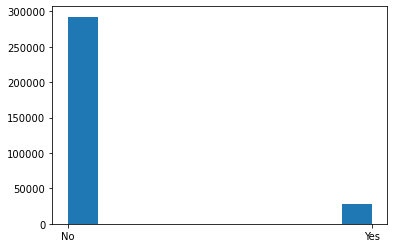

In [4]:
# First look at value partition
print(heart_dataset_target.value_counts())

print("\nPercentages:")
print("No:", heart_dataset_target.value_counts()['No']/heart_dataset_target.size*100)
print("Yes:", heart_dataset_target.value_counts()['Yes']/heart_dataset_target.size*100)

# Visualization of partition with histogramm
plt.hist(heart_dataset_target)
plt.show()

**Conclusion: Dataset is very unbalanced**

In [5]:
# HeartDisease column has two distinct values and is the target variable, so we can use the LabelEncoder for preprocessing
label_encoder = preprocessing.LabelEncoder()

print(heart_dataset_target[0:10])

# Encode data
heart_dataset_target = label_encoder.fit_transform(heart_dataset_target)

heart_dataset_target[0:10]

0     No
1     No
2     No
3     No
4     No
5    Yes
6     No
7     No
8     No
9     No
Name: HeartDisease, dtype: object


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

## None numerical features

Next we need to look whether the features are nominal, ordinal or binary, to choose the right encoder. For this we will look at the unique values of each column and then decide.

In [6]:
none_numerical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                           'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Print unique values of each column
for feature in none_numerical_features:
    print(feature + ":", heart_dataset_preprocessed[feature].unique())

Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
DiffWalking: ['No' 'Yes']
Sex: ['Female' 'Male']
AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity: ['Yes' 'No']
GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma: ['Yes' 'No']
KidneyDisease: ['No' 'Yes']
SkinCancer: ['Yes' 'No']


**Conclusion:**

Nominal features: Race, Diabetic

Ordinal features:
- AgeCategory: Age has a natural order from low to high
- GenHealth: Has a natural order from poor to excellent

Binary features: Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, PhysicalActivity, Asthma, KidneyDisease, SkinCancer

### Encoding nominal features
Nominal features have no order so we will use a one-hot-encoder for those features.

In [7]:
nominal_features = ['Race', 'Diabetic']

# Encoding
one_hot_encoder = preprocessing.OneHotEncoder()
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(heart_dataset_preprocessed[nominal_features]).toarray(),
                               columns=one_hot_encoder.get_feature_names(nominal_features))

# Joining
heart_dataset_preprocessed = heart_dataset_preprocessed.drop(columns=nominal_features)
heart_dataset_preprocessed = heart_dataset_preprocessed.join(one_hot_encoded)
heart_dataset_preprocessed[one_hot_encoder.get_feature_names(nominal_features)]

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
319790,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
319791,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
319792,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
319793,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Encoding ordinal features
Ordinal features have a specific order so we have to make sure that we encode the features according to that order. For this reason we can't use the sklearn OrdinalEncoder because this encoder uses the alphabetical order which doesn't fit with our features´ order. That's why we will use a dictionary to define our desired order and apply that order to our features with the pandas .map() function. https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24

#### AgeCategory

In [8]:
# Create dictionary of ordinal to integer mapping
age_category_order = {'18-24':1, 
                      '25-29':2, 
                      '30-34':3, 
                      '35-39':4, 
                      '40-44':5, 
                      '45-49':6,
                      '50-54':7,
                      '55-59':8,
                      '60-64':9,
                      '65-69':10,
                      '70-74':11,
                      '75-79':12,
                      '80 or older':13}

# Apply using map
heart_dataset_preprocessed['AgeCategory'] = heart_dataset_preprocessed['AgeCategory'].map(age_category_order)
heart_dataset_preprocessed['AgeCategory']

0          8
1         13
2         10
3         12
4          5
          ..
319790     9
319791     4
319792     6
319793     2
319794    13
Name: AgeCategory, Length: 319795, dtype: int64

#### GenHealth

In [9]:
# Create dictionary of ordinal to integer mapping
gen_health_order = {'Poor':1, 
                    'Fair':2, 
                    'Good':3, 
                    'Very good':4, 
                    'Excellent':5}

# Apply using map
heart_dataset_preprocessed['GenHealth'] = heart_dataset_preprocessed['GenHealth'].map(gen_health_order)
heart_dataset_preprocessed['GenHealth']

0         4
1         4
2         2
3         3
4         4
         ..
319790    2
319791    4
319792    3
319793    3
319794    3
Name: GenHealth, Length: 319795, dtype: int64

### Encoding binary features
For binary features we want to encode them with 0 and 1 but we have to make sure that we always use the same number for the same value. For example 1 for yes and 0 for no.

#### Yes/No Features

In [10]:
yes_no_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma',
                   'KidneyDisease', 'SkinCancer']

# Encode yes/no features
for feature in yes_no_features:
    heart_dataset_preprocessed[feature] = heart_dataset_preprocessed[feature].replace({'Yes':1, 'No':0})
    
heart_dataset_preprocessed[yes_no_features]

,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,1,0,0,0,1,1,0,1
1,0,0,1,0,1,0,0,0
2,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
319790,1,0,0,1,0,1,0,0
319791,1,0,0,0,1,1,0,0
319792,0,0,0,0,1,0,0,0
319793,0,0,0,0,0,0,0,0


#### Sex

In [11]:
# Encode Sex feature
heart_dataset_preprocessed['Sex'] = heart_dataset_preprocessed['Sex'].replace({'Female':1, 'Male':0})
heart_dataset_preprocessed['Sex']

0         1
1         1
2         0
3         1
4         1
         ..
319790    0
319791    0
319792    1
319793    1
319794    1
Name: Sex, Length: 319795, dtype: int64